 Upload your unemployment dataset CSV file


Saving Unemployment in India.csv to Unemployment in India (1).csv

 Dataset Loaded Successfully!


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural



🔧 Cleaning Data...

 Missing values:
Region                                     0
Date                                       0
Frequency                                  0
Estimated_Unemployment_Rate_(%)            0
Estimated_Employed                         0
Estimated_Labour_Participation_Rate_(%)    0
Area                                       0
dtype: int64

 Date Range: 2019-05-31 00:00:00 → 2020-06-30 00:00:00


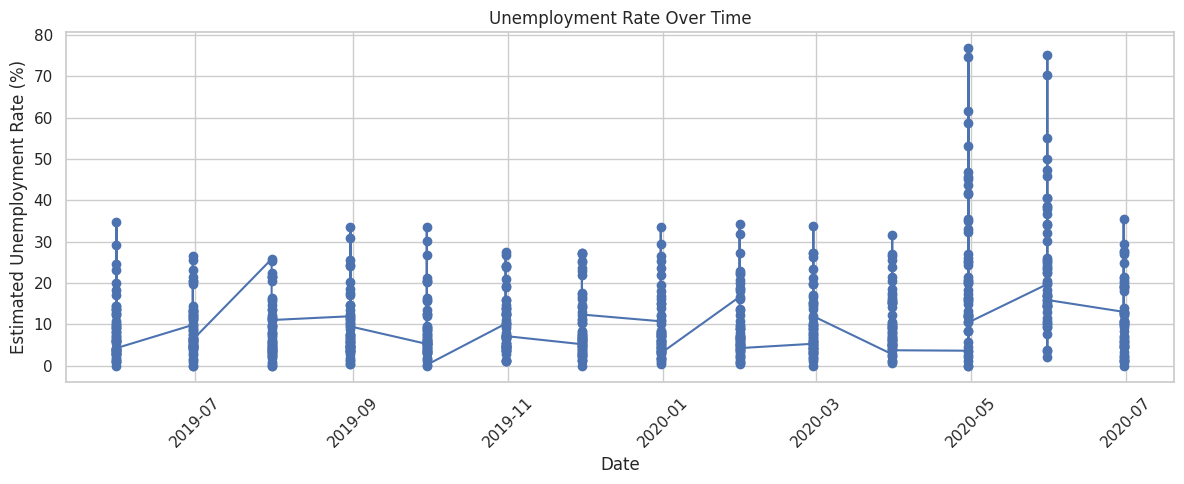

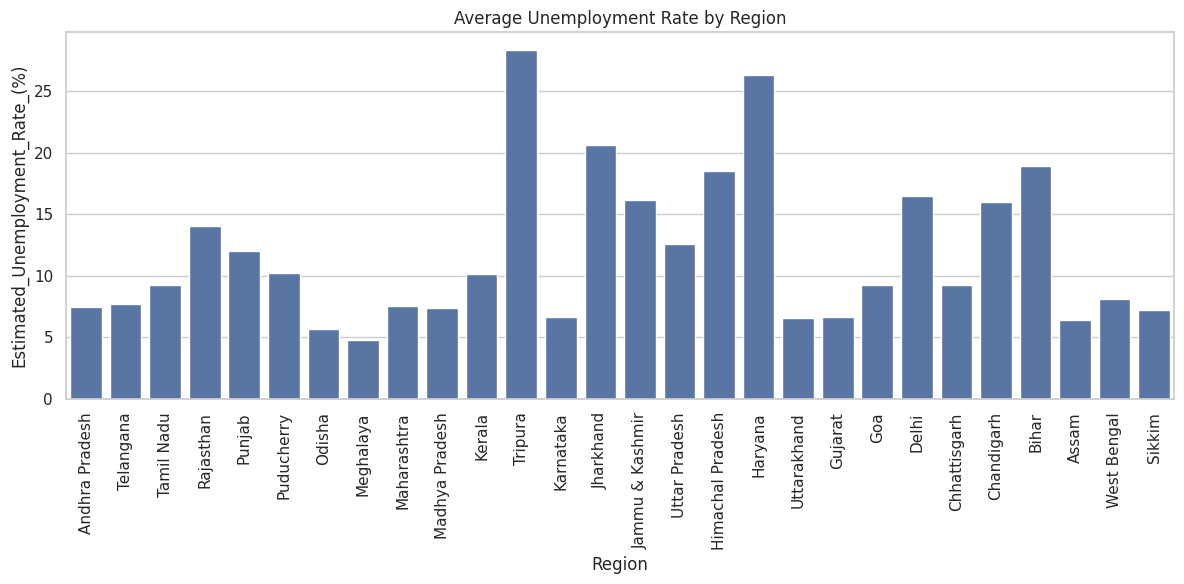

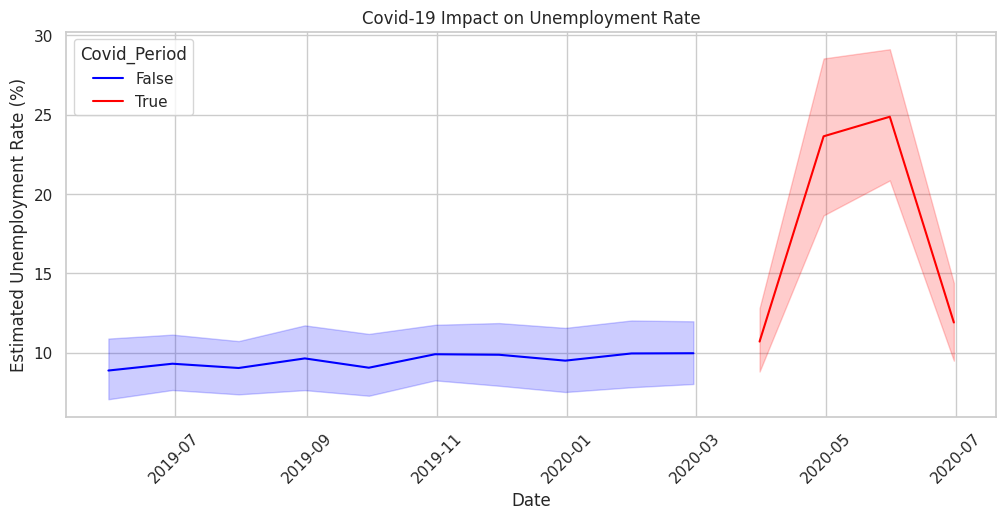


 Average Unemployment Before Covid:
9.509533582089553

 Average Unemployment After/During Covid:
17.77436274509804


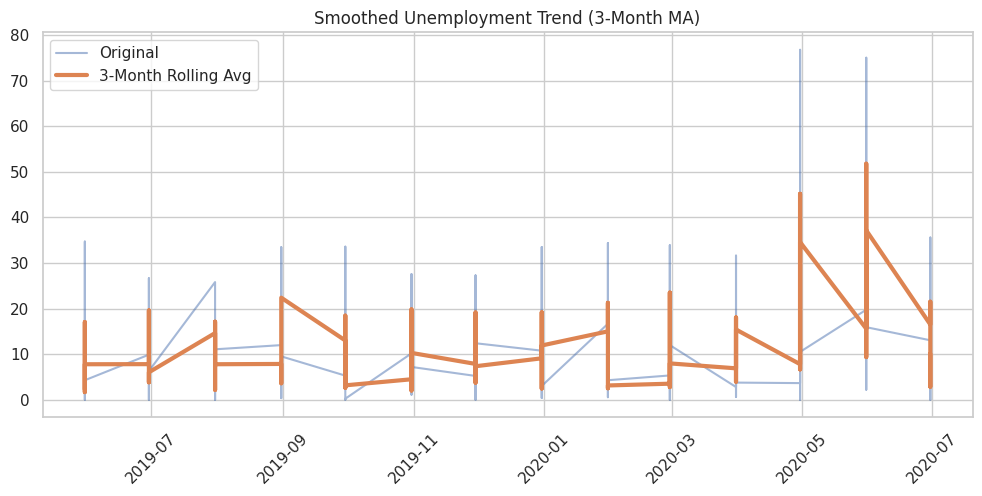

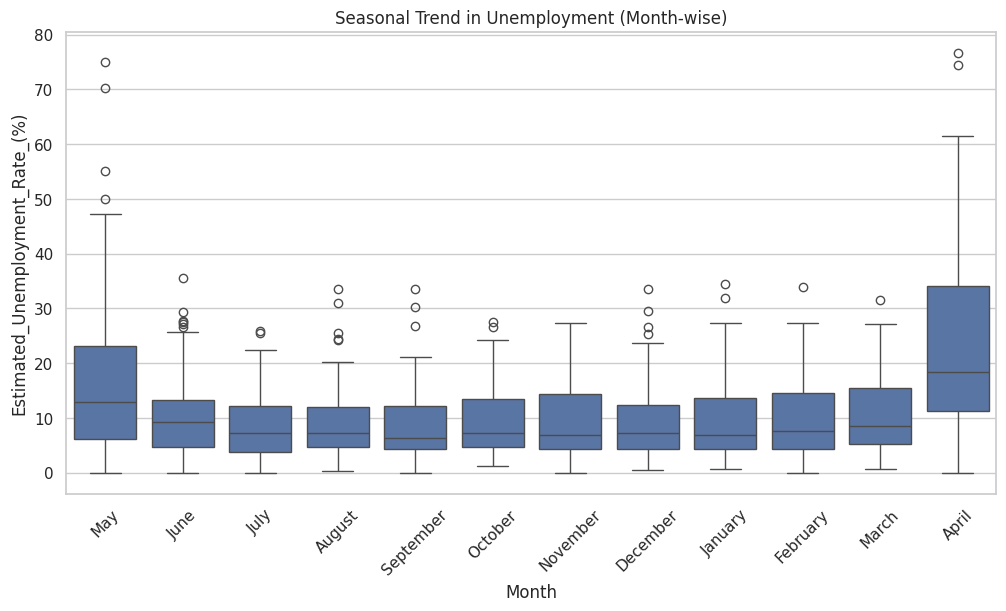

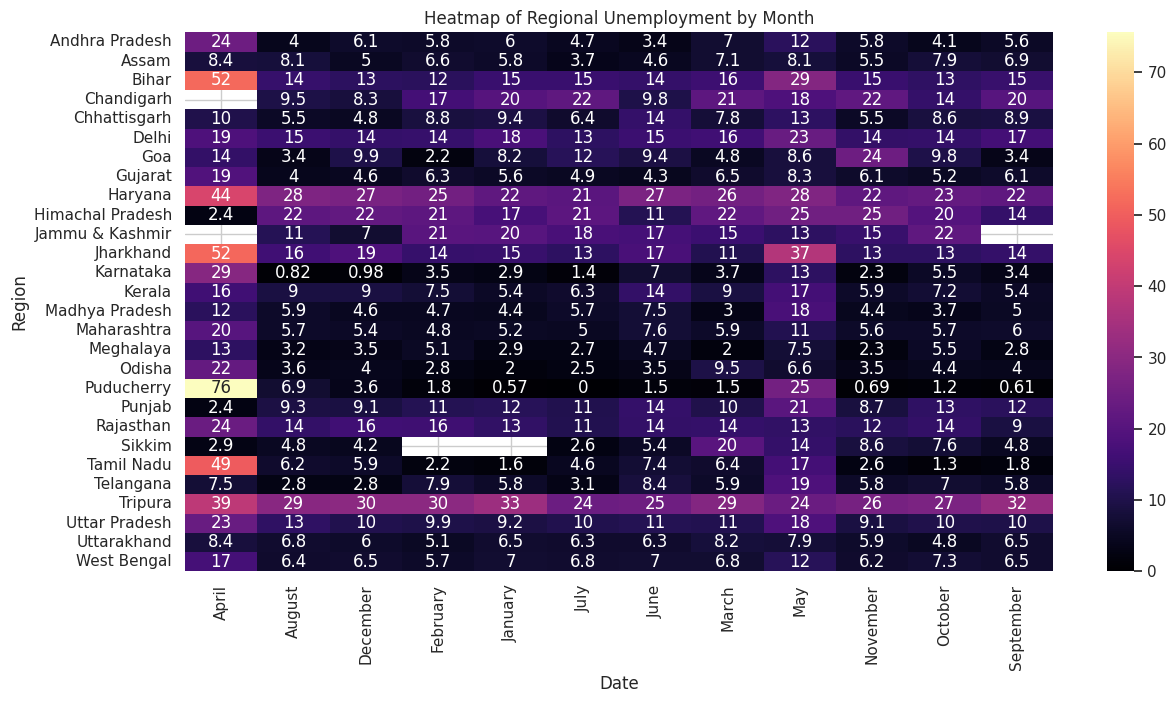


================ INSIGHTS SUMMARY ================

 Highest unemployment:
Region                                      Puducherry
Date                               2020-04-30 00:00:00
Estimated_Unemployment_Rate_(%)                  76.74
Name: 636, dtype: object 

 Lowest unemployment:
Region                                      Puducherry
Date                               2019-05-31 00:00:00
Estimated_Unemployment_Rate_(%)                    0.0
Name: 6, dtype: object 

 Regions with highest average unemployment:
Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name: Estimated_Unemployment_Rate_(%), dtype: float64 

 Regions with lowest average unemployment:
Region
Meghalaya      4.798889
Odisha         5.657857
Assam          6.428077
Uttarakhand    6.582963
Gujarat        6.663929
Name: Estimated_Unemployment_Rate_(%), dtype: float64 

✔ Covid caused a clear increase in un

In [2]:
# =============================================================
# TASK 2 — UNEMPLOYMENT ANALYSIS
# =============================================================

# ----------------------------
# 0. IMPORTS & DATA UPLOAD
# ----------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

print(" Upload your unemployment dataset CSV file")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("\n Dataset Loaded Successfully!")
display(df.head())


# ----------------------------
# 1. CLEANING & PREPROCESSING
# ----------------------------
print("\n🔧 Cleaning Data...")

# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

# Clean Date column
df["Date"] = df["Date"].astype(str).str.strip()
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

# Remove invalid date rows
df = df.dropna(subset=["Date"]).sort_values("Date").reset_index(drop=True)

print("\n Missing values:")
print(df.isnull().sum())

print("\n Date Range:", df["Date"].min(), "→", df["Date"].max())


# ----------------------------
# 2. UNEMPLOYMENT OVER TIME
# ----------------------------
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Estimated_Unemployment_Rate_(%)"], marker="o")
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ----------------------------
# 3. REGION-WISE ANALYSIS
# ----------------------------
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Region", y="Estimated_Unemployment_Rate_(%)", errorbar=None)
plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by Region")
plt.tight_layout()
plt.show()


# ----------------------------
# 4. COVID-19 IMPACT ANALYSIS
# ----------------------------
covid_date = "2020-03-01"
df["Covid_Period"] = df["Date"] >= covid_date

plt.figure(figsize=(12,5))
sns.lineplot(
    data=df,
    x="Date",
    y="Estimated_Unemployment_Rate_(%)",
    hue="Covid_Period",
    palette=["blue", "red"]
)
plt.title("Covid-19 Impact on Unemployment Rate")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()

print("\n Average Unemployment Before Covid:")
print(df[df["Covid_Period"]==False]["Estimated_Unemployment_Rate_(%)"].mean())

print("\n Average Unemployment After/During Covid:")
print(df[df["Covid_Period"]==True]["Estimated_Unemployment_Rate_(%)"].mean())


# ----------------------------
# 5. ROLLING TRENDS (3-Month MA)
# ----------------------------
df["Rolling_Avg_3M"] = df["Estimated_Unemployment_Rate_(%)"].rolling(window=3).mean()

plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Estimated_Unemployment_Rate_(%)"], label="Original", alpha=0.5)
plt.plot(df["Date"], df["Rolling_Avg_3M"], label="3-Month Rolling Avg", linewidth=3)
plt.title("Smoothed Unemployment Trend (3-Month MA)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


# ----------------------------
# 6. SEASONAL PATTERN ANALYSIS
# ----------------------------
df["Month"] = df["Date"].dt.month_name()

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Month", y="Estimated_Unemployment_Rate_(%)")
plt.xticks(rotation=45)
plt.title("Seasonal Trend in Unemployment (Month-wise)")
plt.show()


# ----------------------------
# 7. HEATMAP — REGION × MONTH
# ----------------------------
pivot = df.pivot_table(
    values="Estimated_Unemployment_Rate_(%)",
    index="Region",
    columns=df["Date"].dt.month_name(),
    aggfunc="mean"
)

plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap="magma")
plt.title("Heatmap of Regional Unemployment by Month")
plt.show()


# ----------------------------
# 8. AUTOMATIC INSIGHTS
# ----------------------------
print("\n================ INSIGHTS SUMMARY ================\n")

print(" Highest unemployment:")
print(df.loc[df["Estimated_Unemployment_Rate_(%)"].idxmax()][["Region","Date","Estimated_Unemployment_Rate_(%)"]], "\n")

print(" Lowest unemployment:")
print(df.loc[df["Estimated_Unemployment_Rate_(%)"].idxmin()][["Region","Date","Estimated_Unemployment_Rate_(%)"]], "\n")

print(" Regions with highest average unemployment:")
print(df.groupby("Region")["Estimated_Unemployment_Rate_(%)"].mean().sort_values(ascending=False).head(), "\n")

print(" Regions with lowest average unemployment:")
print(df.groupby("Region")["Estimated_Unemployment_Rate_(%)"].mean().sort_values().head(), "\n")

print("✔ Covid caused a clear increase in unemployment.")
print("✔ Rolling average reveals long-term smoothed trends.")
print("✔ Seasonal variation can be seen in month-wise boxplot.")
print("✔ Heatmap shows region–month relationships clearly.")
print("\n===================================================\n")
